# 180280116127-Practical: 3 Titanic dataset 

Entropy, Information Gain and DATASET Attribute Ranking

In [32]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt

In [35]:
address = 'C:/Users/Acer/Downloads/Titanic_data.csv'
Ti_data = pd.read_csv(address)
Ti_data.columns=['passenger','Survived','Pclass','name','sex','age','sibsp','parch','ticket','fare','cabin','emb']
data.head()

,index,passenger,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,emb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
Ti_data.isna().sum()

passenger      0
Survived       0
Pclass         0
name           0
sex            0
age          177
sibsp          0
parch          0
ticket         0
fare           0
cabin        687
emb            2
dtype: int64

In [37]:
#Replace NA Values with Median in Age Column
#Replace NA Values in Cabin with 'XXX'
#Replace NA Values in Embarked with Most Frequent Values 
Ti_data['fare']=Ti_data['fare'].fillna(data['fare'].median())
Ti_data['cabin']=Ti_data['cabin'].fillna('XXX')
Ti_data['emb']=Ti_data['emb'].fillna(data['emb'].mode()[0])
Ti_data.isna().sum()

passenger      0
Survived       0
Pclass         0
name           0
sex            0
age          177
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
emb            0
dtype: int64

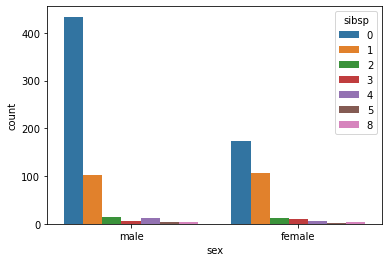

In [38]:
sns.countplot(x="sex",hue="sibsp", data=Ti_data)
#sns.countplot(x="Sex", data=data)
#sns.countplot(x="Age",hue="Sex",data=data)

In [39]:
#Add Dummy Column with survived=1, nonservived=0 
df=(pd.get_dummies(Ti_data['passenger'],drop_first=True))
#Add Dummy Column with Male=1, Female=0 
df1=(pd.get_dummies(Ti_data['sex'],drop_first=True)).rename(columns={'male':'gender'})
df1.head()

,gender
0,1
1,0
2,0
3,0
4,1


In [40]:
titanic=pd.concat([Ti_data,df,df1],axis=1)
titanic

,passenger,Survived,Pclass,name,sex,age,sibsp,parch,ticket,fare,...,883,884,885,886,887,888,889,890,891,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,0,0,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,0,0,1,0,1


In [41]:
AGE=(pd.get_dummies(titanic['age'],drop_first=True)).rename(columns={'Over 40': 'Over40','Under 18': 'Under18'})
AGE

,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Add Dummy Column with emb_q,emb_s,(c )
EMB=(pd.get_dummies(titanic['emb'],drop_first=True)).rename(columns={'Q': 'EMB_Q','S': 'EMB_S'})

NewTitanic=pd.concat([titanic,EMB,AGE],axis=1)
NewTitanic

,passenger,Survived,Pclass,name,sex,age,sibsp,parch,ticket,fare,...,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,0,0,0,0,0


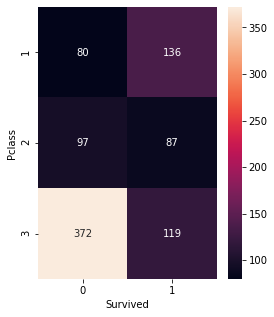

In [105]:
# Group the dataset by Pclass and Survived and then unstack them 
group = NewTitanic.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
plt.figure(figsize = (4,5))

# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d",color="orange")

In [59]:

NewTitanic.sibsp.value_counts(sort=False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: sibsp, dtype: int64

In [61]:
Survived=len(NewTitanic[NewTitanic['Survived']==1])
SurvivedProb=Survived/len(NewTitanic)
SurvivedProb

0.3838383838383838

In [62]:
NSurvived=len(NewTitanic[NewTitanic['Survived']==0])
NSurvivedProb=NSurvived/len(NewTitanic)
NSurvivedProb

0.6161616161616161

In [63]:
# calculate the column wise entropy for the split in the dataset
def colentropy(list):
    if(sum(list)<=1.01):
        if "NaN" in list:
            return 0
        else:
            return sum([-i*np.log2(i) for i in list])
    else:
        print("Sum of Probabilties in Column is not 1 %5.4f " % sum(list))
        return 0

In [64]:
entropy = -(SurvivedProb * math.log2(SurvivedProb) + NSurvivedProb * math.log2(NSurvivedProb))
# print the result
print('entropy: %.7f bits' % entropy)

entropy: 0.9607079 bits


In [65]:
NewTitanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
colentropy(NewTitanic.Survived.value_counts()/len(NewTitanic))

0.9607079018756469

In [67]:
colentropy(NewTitanic.gender.value_counts()/len(NewTitanic))

0.9362046432498521

In [68]:
colentropy(NewTitanic.age.value_counts()/len(NewTitanic))

4.933159016827749

In [69]:
colentropy(NewTitanic.Pclass.value_counts()/len(NewTitanic))

1.4393214704441286

In [70]:
colentropy(NewTitanic.sibsp.value_counts()/len(NewTitanic))

1.3385591753367154

In [71]:
colentropy(NewTitanic.parch.value_counts()/len(NewTitanic))

1.1283373786812922

In [72]:

colentropy(NewTitanic.EMB_Q.value_counts()/len(NewTitanic))

0.4244051447248036

In [74]:
colentropy(NewTitanic.EMB_S.value_counts()/len(NewTitanic))


0.8485089344423424

In [75]:
colentropy(NewTitanic.emb.value_counts()/len(NewTitanic))

1.0954499045829607

In [76]:
group = NewTitanic.groupby(['gender', 'Survived']) 
Gender_survived = group.size().unstack() 
Gender_survived

Survived,0,1
gender,,
0,81,233
1,468,109


In [77]:
NewTitanic.gender.value_counts(sort=False)

0    314
1    577
Name: gender, dtype: int64

In [78]:
NewTitanic.gender.value_counts(sort=False)/len(NewTitanic)

0    0.352413
1    0.647587
Name: gender, dtype: float64

In [79]:
group = NewTitanic.groupby(['sex', 'Survived']) 
Gender_survived = group.size().unstack() 
#Gender Column Entropy
FemaleEntropy=colentropy(Gender_survived.iloc[0]/NewTitanic.gender.value_counts()[0])
MaleEntropy=colentropy(Gender_survived.iloc[1]/NewTitanic.gender.value_counts()[1])
print(str(MaleEntropy)+" " +str(FemaleEntropy))

0.6991817891208407 0.8236550739295191


In [80]:
HS=colentropy(NewTitanic.Survived.value_counts()/len(NewTitanic))
print(HS)

0.9607079018756469


In [81]:
Val=NewTitanic.gender.value_counts()/sum(Gender_survived.sum(axis=1))
HS-Val[0]*FemaleEntropy-Val[1]*MaleEntropy

0.2176601066606143

In [82]:
Classgroup = NewTitanic.groupby(['Pclass', 'Survived']) 
Class_survived = Classgroup.size().unstack() 
print(Class_survived)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [83]:
Class_survived.iloc[2]/NewTitanic.Pclass.value_counts(sort=False).iloc[2]

Survived
0    0.757637
1    0.242363
Name: 3, dtype: float64

In [84]:
NewTitanic.Pclass.value_counts(sort=False).iloc[2]

491

In [85]:
Class_survived.div(NewTitanic.Pclass.value_counts(sort=False),axis=0)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [86]:
ClassProb=Class_survived.div(NewTitanic.Pclass.value_counts(sort=False),axis=0)
C1Entropy=colentropy(ClassProb.iloc[0])
C2Entropy=colentropy(ClassProb.iloc[1])
C3Entropy=colentropy(ClassProb.iloc[2])
print("C1:"+str(C1Entropy)+"C2:"+str(C2Entropy)+"C3:"+str(C3Entropy))

C1:0.9509560484549725C2:0.9978683156711936C3:0.7989470522661535


In [87]:
NewTitanic.Pclass.value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [88]:
Weight=NewTitanic.Pclass.value_counts(sort=False)/len(NewTitanic)

In [89]:
HS-(Weight[1]*C1Entropy+Weight[2]*C2Entropy+Weight[3]*C3Entropy)

0.0838310452960116

In [90]:
SIBgroup = NewTitanic.groupby(['sibsp', 'Survived'])
SIB_survived = SIBgroup.size().unstack()
print(SIB_survived)

Survived      0      1
sibsp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


In [91]:
SIB_survived.div(NewTitanic.sibsp.value_counts(sort=False),axis=0)

Survived,0,1
sibsp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,NaN
8,1.000000,NaN


In [92]:
SIBProb=SIB_survived.div(NewTitanic.sibsp.value_counts(sort=False),axis=0)
print(SIBProb.iloc[0])
SIBEntropy=[
    colentropy(SIBProb.iloc[0]), colentropy(SIBProb.iloc[1]),   colentropy(SIBProb.iloc[2]),colentropy(SIBProb.iloc[3]),colentropy(SIBProb.iloc[4]),colentropy(SIBProb.iloc[5]),colentropy(SIBProb.iloc[6])]
print(SIBEntropy)

Survived
0    0.654605
1    0.345395
Name: 0, dtype: float64
Sum of Probabilties in Column is not 1   nan 
Sum of Probabilties in Column is not 1   nan 
[0.929887780406977, 0.9962811561832605, 0.996316519558962, 0.8112781244591328, 0.6500224216483541, 0, 0]


In [93]:
SIBEntropy

[0.929887780406977,
 0.9962811561832605,
 0.996316519558962,
 0.8112781244591328,
 0.6500224216483541,
 0,
 0]

In [94]:
SIBWeight=NewTitanic.sibsp.value_counts(sort=False)/len(NewTitanic)
print(SIBWeight)

0    0.682379
1    0.234568
2    0.031425
3    0.017957
4    0.020202
5    0.005612
8    0.007856
Name: sibsp, dtype: float64


In [95]:
HS-sum(SIBWeight*SIBEntropy)

0.03346632133870997

In [96]:
EMBgroup = NewTitanic.groupby(['emb', 'Survived'])
EMB_survived = EMBgroup.size().unstack()
print(EMB_survived)

Survived    0    1
emb               
C          75   93
Q          47   30
S         427  219


In [97]:
EMB_survived.div(NewTitanic.emb.value_counts(sort=False),axis=0)

Survived,0,1
emb,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


In [98]:
EMBProb=EMB_survived.div(NewTitanic.emb.value_counts(sort=False),axis=0)
print(EMBProb.iloc[0])
EMBEntropy=[
    colentropy(EMBProb.iloc[0]), colentropy(EMBProb.iloc[1]),   colentropy(EMBProb.iloc[2])]
print(EMBEntropy)

Survived
0    0.446429
1    0.553571
Name: C, dtype: float64
[0.9917033083725818, 0.9645476589143231, 0.9238675049871039]


In [99]:
EMBWeight=NewTitanic.emb.value_counts(sort=False)/len(NewTitanic)
print(EMBWeight)

C    0.188552
Q    0.086420
S    0.725028
Name: emb, dtype: float64


In [100]:
HS-sum(EMBWeight*EMBEntropy)

0.02053423884010741

In [101]:
PRCgroup = NewTitanic.groupby(['parch', 'Survived'])
PRC_survived = PRCgroup.size().unstack()
print(PRC_survived)
PRCProb=PRC_survived.div(NewTitanic.parch.value_counts(sort=False),axis=0)
print(NewTitanic.parch.value_counts(sort=False))
PRCEntropy=[colentropy(PRCProb.iloc[0]), colentropy(PRCProb.iloc[1]),colentropy(PRCProb.iloc[2]),colentropy(PRCProb.iloc[3]),colentropy(PRCProb.iloc[4]),colentropy(PRCProb.iloc[5]),colentropy(PRCProb.iloc[6])]
print(PRCEntropy)
PRCWeight=NewTitanic.parch.value_counts(sort=False)/len(NewTitanic)
print(PRCWeight)
HS-sum(PRCWeight*PRCEntropy)

Survived      0      1
parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: parch, dtype: int64
Sum of Probabilties in Column is not 1   nan 
Sum of Probabilties in Column is not 1   nan 
[0.9282760491107238, 0.9925270159830353, 1.0, 0.9709505944546686, 0, 0.7219280948873623, 0]
0    0.760943
1    0.132435
2    0.089787
3    0.005612
4    0.004489
5    0.005612
6    0.001122
Name: parch, dtype: float64


0.02361054763347059

In [104]:
AGERgroup = NewTitanic.groupby(['age', 'Survived'])
AGER_survived = AGERgroup.size().unstack()
print(AGER_survived)
AGERProb=AGER_survived.div(NewTitanic.age.value_counts(sort=False),axis=0)
print(NewTitanic.age.value_counts(sort=False))
AGEREntropy=[colentropy(AGERProb.iloc[0]), colentropy(AGERProb.iloc[1]),colentropy(AGERProb.iloc[2])]
print(AGEREntropy)
AGERWeight=NewTitanic.age.value_counts(sort=False)/len(NewTitanic)
print(AGERWeight)

Survived    0    1
age               
0.42      NaN  1.0
0.67      NaN  1.0
0.75      NaN  2.0
0.83      NaN  2.0
0.92      NaN  1.0
...       ...  ...
70.00     2.0  NaN
70.50     1.0  NaN
71.00     2.0  NaN
74.00     1.0  NaN
80.00     NaN  1.0

[88 rows x 2 columns]
22.00    27
38.00    11
26.00    18
35.00    18
54.00     8
         ..
0.92      1
0.83      2
0.67      1
70.50     1
0.42      1
Name: age, Length: 88, dtype: int64
Sum of Probabilties in Column is not 1   nan 
Sum of Probabilties in Column is not 1   nan 
Sum of Probabilties in Column is not 1   nan 
[0, 0, 0]
22.00    0.030303
38.00    0.012346
26.00    0.020202
35.00    0.020202
54.00    0.008979
           ...   
0.92     0.001122
0.83     0.002245
0.67     0.001122
70.50    0.001122
0.42     0.001122
Name: age, Length: 88, dtype: float64
